In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

iris = datasets.load_iris()
x = iris.data[:, [2,3]]
y = iris.target
print('Class labels:', np.unique(y))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1, stratify=y
)


Class labels: [0 1 2]
     teste1  teste2
0       1.4     0.2
1       1.4     0.2
2       1.3     0.2
3       1.5     0.2
4       1.4     0.2
..      ...     ...
145     5.2     2.3
146     5.0     1.9
147     5.2     2.0
148     5.4     2.3
149     5.1     1.8

[150 rows x 2 columns]


In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(x, y, classifier, test_idx=None, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max()+1
    x2_min, x2_max = x[:, 1].min() -1, x[:, 1].max()+1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0],
                    y=x[y == cl,1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')


        if test_idx:
            x_test, y_test = x[test_idx, :], y[test_idx]

            plt.scatter(x_test[:, 0], x_test[:, 1], c='grey', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o', s=100, label='test set')
    

In [3]:
class LogisticRegressionGD(object):
    
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, x, y):
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + x.shape[1])
        self.cost_ = []
        
        
        for i in range(self.n_iter):
            net_input = self.net_input(x)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * x.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            
            self.cost_.append(cost)
                    
        return self
    
    def net_input(self, x):
        
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, x):
        
        return np.where(self.net_input(x) >= 0.0, 1, 0)
        
        

C:\Users\felip\AppData\Local\Temp\ipykernel_8160\2234856668.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y == cl, 0],


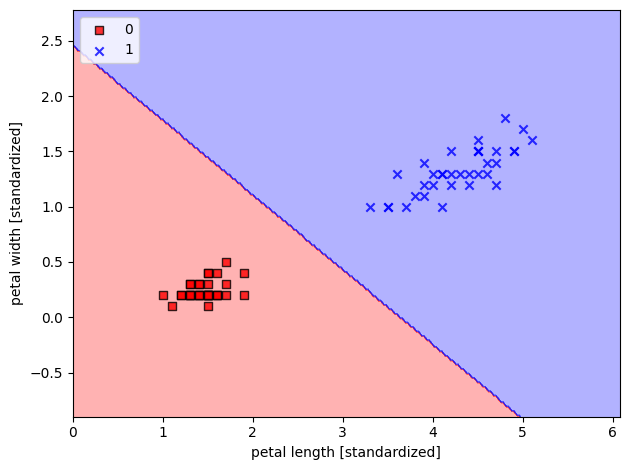

In [4]:
x_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)

lrgd.fit(x_train_01_subset, y_train_01_subset)

plot_decision_regions(x=x_train_01_subset, y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


